In [18]:
import pandas as pd
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
dirname='noise2ppg_v2'

In [5]:
abp = pd.read_csv(f'../re/cgan-ppg2abp/{dirname}/abp.csv')

n_samples = len(abp)
n_samples

2516

In [8]:
abp.head()

,min,max,key
0,66.285640,127.010973,0
1,65.341697,130.948278,1
2,67.412476,130.902082,2
3,67.835630,131.726369,3
4,68.448208,132.504339,4


In [8]:
def fixvalue(x, max,min,c=155.0):
    return (x-50)/(c/(max-min))+min

In [49]:
def img2sig(path,title='signal'):
    im = np.array(Image.open(path))
    im_avg = np.average(im,axis=0)
    # print(im_avg)
    sbp = np.max(im_avg)
    dbp = np.min(im_avg)
    plt.figure()
    plt.plot(np.arange(im_avg.shape[0]),im_avg)
    plt.title(f'{title}\nmax={sbp:.1f}, min={dbp:.1f}')

In [52]:
def img2sigfix(path,n=0,title='signal'):
    im = np.array(Image.open(path))
    im_avg = np.average(im,axis=0)
    # print(im_avg)
    im_avg = fixvalue(im_avg,sbp_real[n],dbp_real[n])
    sbp = np.max(im_avg)
    dbp = np.min(im_avg)
    plt.figure()
    plt.plot(np.arange(im_avg.shape[0]),im_avg)
    plt.title(f'{title}\nSBP={sbp:.1f}, DBP={dbp:.1f}')

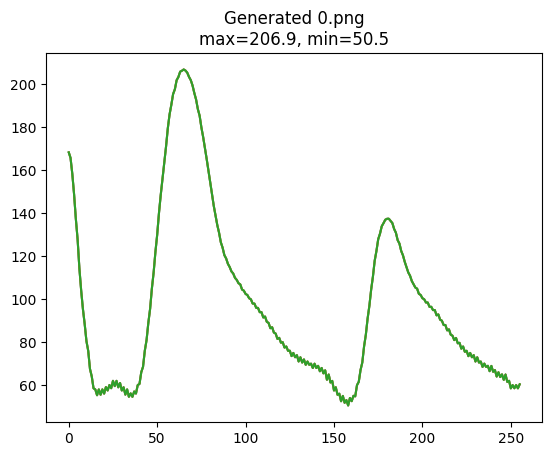

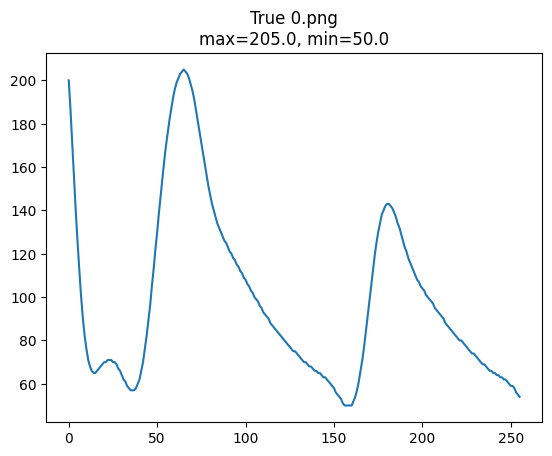

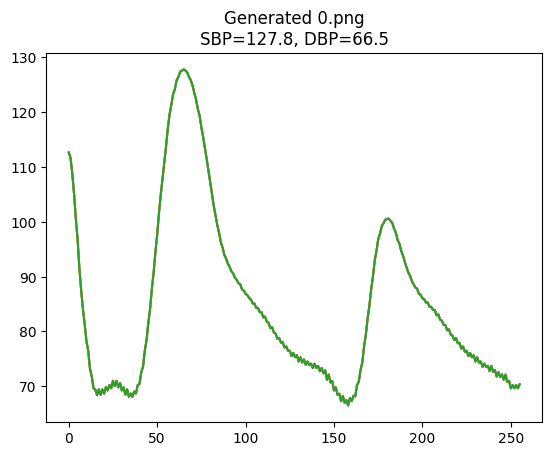

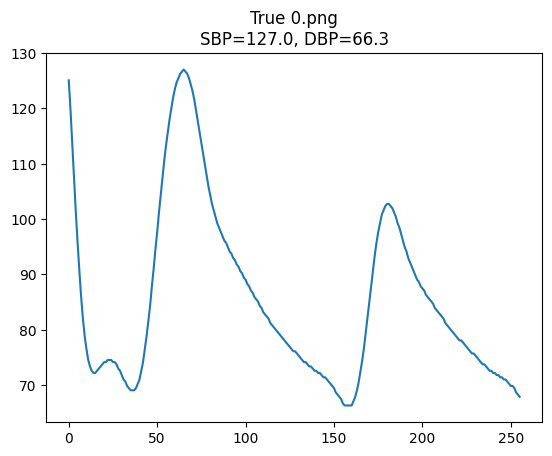

In [53]:
# im = np.array(Image.open(f'../re/cgan-ppg2abp/pytorch-CycleGAN-and-pix2pix/results/ppg2abp_mimicIII_all_s2/test_latest/images/0_rec_A.png'))
# im_avg = np.average(im,axis=0)
# print(im_avg)
# plt.figure()
# plt.plot(np.arange(im_avg.shape[0]),im_avg)
img2sig('../re/cgan-ppg2abp/pytorch-CycleGAN-and-pix2pix/results/ppg2abp_mimicIII_all_s2/test_latest/images/0_rec_A.png',title='Generated 0.png')
img2sig('../re/cgan-ppg2abp/noise2ppg_v2/testA/0.png', title='True 0.png')
img2sigfix('../re/cgan-ppg2abp/pytorch-CycleGAN-and-pix2pix/results/ppg2abp_mimicIII_all_s2/test_latest/images/0_rec_A.png',title='Generated 0.png')
img2sigfix('../re/cgan-ppg2abp/noise2ppg_v2/testA/0.png', title='True 0.png')

In [ ]:
im_true = np.array(Image.open(f'../re/cgan-ppg2abp/noise2ppg_v2/testA/0.png'))

In [14]:
sbp = []
dbp = []
sbp_real = abp['max'].values
dbp_real = abp['min'].values
sbp_tmp_arr = []
dbp_tmp_arr = []
for i in tqdm(range(n_samples)):
    im = np.array(Image.open(f'../re/cgan-ppg2abp/pytorch-CycleGAN-and-pix2pix/results/ppg2abp_mimicIII_all_s2/test_latest/images/{i}_rec_A.png'))
    # sbp_tmp = np.max(np.average(im,axis=0))
    sbp_tmp = np.max(im)
    sbp.append(fixvalue(sbp_tmp,sbp_real[i],dbp_real[i]))
    # dbp_tmp = np.min(np.average(im,axis=0))
    dbp_tmp = np.min(im)
    dbp.append(fixvalue(dbp_tmp,sbp_real[i],dbp_real[i]))
    sbp_tmp_arr.append(sbp_tmp)
    dbp_tmp_arr.append(dbp_tmp)
sbp = np.array(sbp)
dbp = np.array(dbp)
    

100%|██████████| 2516/2516 [00:00<00:00, 3098.53it/s]


In [15]:
dbp_tmp_arr

[50,
 39,
 45,
 45,
 42,
 47,
 46,
 43,
 44,
 47,
 45,
 48,
 45,
 47,
 48,
 46,
 46,
 45,
 46,
 50,
 46,
 45,
 46,
 47,
 47,
 45,
 47,
 45,
 47,
 47,
 47,
 46,
 47,
 46,
 47,
 48,
 46,
 45,
 47,
 45,
 45,
 47,
 46,
 45,
 46,
 47,
 47,
 45,
 46,
 46,
 48,
 45,
 46,
 47,
 38,
 45,
 45,
 47,
 45,
 47,
 47,
 47,
 46,
 47,
 45,
 46,
 46,
 48,
 46,
 47,
 43,
 34,
 48,
 47,
 45,
 46,
 45,
 45,
 46,
 45,
 47,
 48,
 44,
 45,
 45,
 46,
 45,
 47,
 44,
 45,
 46,
 45,
 45,
 47,
 45,
 46,
 46,
 44,
 46,
 47,
 44,
 42,
 47,
 42,
 44,
 46,
 45,
 45,
 47,
 39,
 46,
 46,
 44,
 46,
 46,
 46,
 45,
 45,
 48,
 46,
 46,
 46,
 48,
 49,
 46,
 47,
 47,
 45,
 47,
 48,
 47,
 45,
 46,
 46,
 46,
 48,
 45,
 46,
 46,
 46,
 39,
 47,
 46,
 47,
 48,
 44,
 45,
 43,
 44,
 42,
 44,
 40,
 46,
 43,
 43,
 43,
 43,
 42,
 45,
 38,
 42,
 42,
 44,
 45,
 43,
 42,
 42,
 41,
 44,
 42,
 40,
 40,
 40,
 43,
 45,
 44,
 44,
 39,
 41,
 41,
 42,
 44,
 45,
 44,
 41,
 39,
 40,
 42,
 41,
 43,
 44,
 41,
 46,
 44,
 42,
 41,
 41,
 43,
 45,
 44,


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# sbp
me_sbp = np.average(sbp-sbp_real)
mae_sbp = mean_absolute_error(sbp_real,sbp)
rmse_sbp = np.sqrt(mean_squared_error(sbp_real,sbp))
std_sbp = np.std(sbp-sbp_real)
me_sbp,mae_sbp,rmse_sbp,std_sbp

(0.7097811320888612,
 0.8645490326233518,
 1.1306239556772224,
 0.8800689028035614)

In [17]:
# dbp
me_dbp = np.average(dbp-dbp_real)
mae_dbp = mean_absolute_error(dbp_real,dbp)
rmse_dbp = np.sqrt(mean_squared_error(dbp_real,dbp))
std_dbp = np.std(dbp-dbp_real)
me_dbp,mae_dbp,rmse_dbp,std_dbp

(-1.850793216463101, 1.8794548038758554, 2.2736788921334297, 1.320674136351307)

Text(0, 0.5, 'Error')

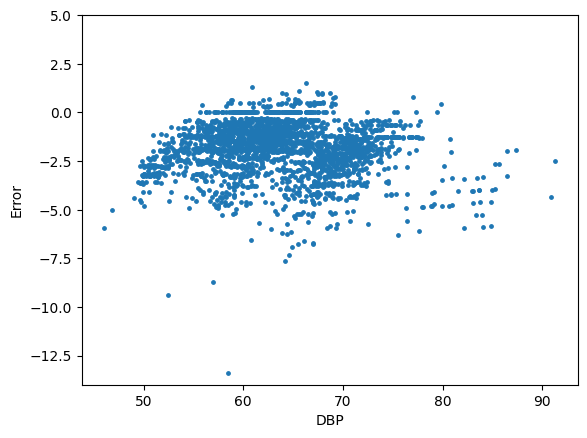

In [25]:
plt.figure()
plt.scatter(dbp,dbp-dbp_real,s=6)
plt.ylim(-14,5)
plt.xlabel('DBP')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

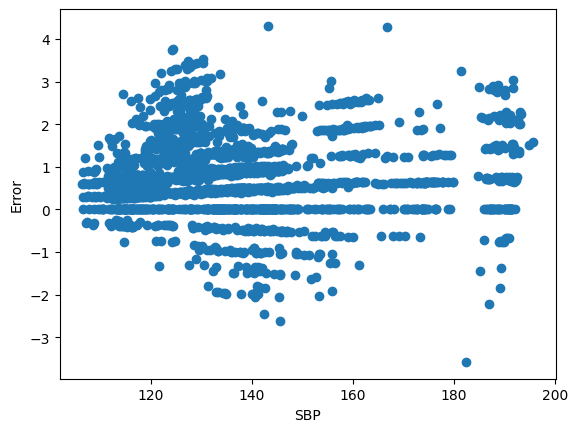

In [55]:
plt.figure()
plt.scatter(sbp,sbp-sbp_real)
# plt.ylim(-14,5)
plt.xlabel('SBP')
plt.ylabel('Error')

Text(0, 0.5, 'frequency')

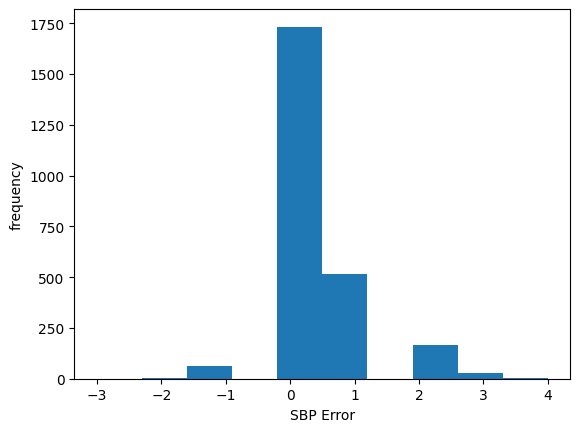

In [27]:
plt.figure()
plt.hist((sbp-sbp_real).astype(int))
plt.xlabel('SBP Error')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

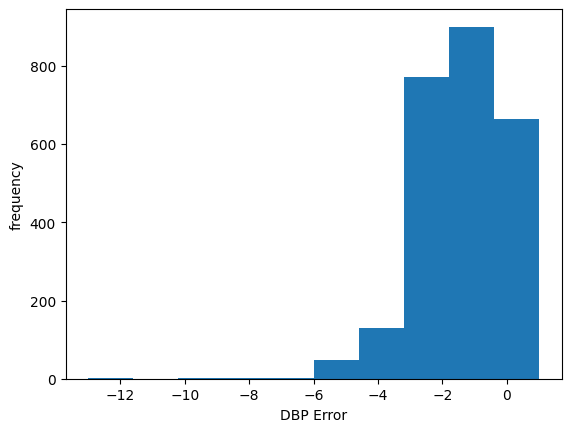

In [28]:
plt.figure()
plt.hist((dbp-dbp_real).astype(int))
plt.xlabel('DBP Error')
plt.ylabel('frequency')